# Application with random weights (Genetic Algo)

In [10]:
# Lire et analyser le fichier de dataset
file_path = "Data\pi-13-1000-1000-001.kna"

# Afficher un aperçu du contenu du fichier
with open(file_path, "r") as file:
    dataset_preview = file.readlines()[:20]  # Lire les 20 premières lignes pour analyse

dataset_preview


<>:2: SyntaxWarning: invalid escape sequence '\p'
<>:2: SyntaxWarning: invalid escape sequence '\p'
C:\Users\Epulapp\AppData\Local\Temp\ipykernel_16532\3412950412.py:2: SyntaxWarning: invalid escape sequence '\p'
  file_path = "Data\pi-13-1000-1000-001.kna"


['NAME: pi-13-1000-1000-001.kna\n',
 'COMMENT: strongly correlated span(2 10)\n',
 'PROBLEM: knapsack\n',
 'NB_ITEMS: 1000\n',
 'MAX_CAPACITY: 3177\n',
 '\n',
 'DATA [id profit weight]:\n',
 '1 234 114\n',
 '2 39 19\n',
 '3 1053 873\n',
 '4 351 291\n',
 '5 585 485\n',
 '6 78 38\n',
 '7 117 97\n',
 '8 234 194\n',
 '9 312 152\n',
 '10 156 76\n',
 '11 156 76\n',
 '12 273 133\n',
 '13 351 291\n']

In [65]:
import random

# Paramètres de l'algorithme génétique
population_size = 50
num_generations = 100
mutation_rate = 0.05

# Fonction pour charger les données depuis un fichier

def load_knapsack_data(file_path):
    weights = []
    profits = []
    max_capacity = 0
    
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if not parts:
            continue

        if parts[0] == "MAX_CAPACITY:":
            max_capacity = int(parts[1])
        elif parts[0].isdigit():  # Ligne contenant les données des objets
            _, profit, weight = map(int, parts)  # Ignorer l'ID et extraire profit et poids
            profits.append(profit)
            weights.append(weight)
    
    return weights, profits, max_capacity

# Charger les données depuis le fichier
file_path = "Data/pi-12-10000-1000-001.kna"  # Remplacer par le bon chemin
weights, profits, max_capacity = load_knapsack_data(file_path)

# Classe représentant une solution pour le problème du sac à dos
class KnapsackSolution:
    def __init__(self, weights, profits, max_capacity, chromosome=None):
        self.weights = weights
        self.profits = profits
        self.capacity = max_capacity
        self.num_items = len(weights)

        # Générer un chromosome valide dès l'initialisation
        if chromosome is None:
            self.chromosome = self.generate_valid_chromosome()
        else:
            self.chromosome = chromosome

        self.total_weight = sum(w for w, c in zip(self.weights, self.chromosome) if c)
        self.total_profit = sum(p for p, c in zip(self.profits, self.chromosome) if c)

        # Correction des solutions non valides
        self.correct_solution()

    def generate_valid_chromosome(self):
        """Génère un chromosome qui respecte la contrainte de poids."""
        chromosome = [False] * self.num_items
        indices = list(range(self.num_items))
        random.shuffle(indices)
        current_weight = 0

        for i in indices:
            if current_weight + self.weights[i] <= self.capacity:
                chromosome[i] = True
                current_weight += self.weights[i]

        return chromosome

    def correct_solution(self):
        """Si la solution dépasse la capacité, retire des objets au hasard."""
        while self.total_weight > self.capacity:
            indices = [i for i, c in enumerate(self.chromosome) if c]
            if not indices:
                break
            remove_idx = random.choice(indices)
            self.chromosome[remove_idx] = False
            self.total_weight -= self.weights[remove_idx]
            self.total_profit -= self.profits[remove_idx]

    def __lt__(self, other):
        return self.total_profit > other.total_profit  # Tri en ordre décroissant de profit

# Sélection par tournoi
def tournament_selection(population, k=5):
    selected = random.sample(population, k)
    return max(selected, key=lambda x: x.total_profit)

# Croisement (one-point crossover)
def crossover(parent1, parent2, max_capacity):
    point = random.randint(1, len(parent1.chromosome) - 1)
    child1 = parent1.chromosome[:point] + parent2.chromosome[point:]
    child2 = parent2.chromosome[:point] + parent1.chromosome[point:]
    return KnapsackSolution(weights, profits, max_capacity, child1), KnapsackSolution(weights, profits, max_capacity, child2)

# Mutation (bit-flip mutation)
def mutate(solution, max_capacity):
    new_chromosome = solution.chromosome[:]
    for i in range(len(new_chromosome)):
        if random.random() < mutation_rate:
            new_chromosome[i] = not new_chromosome[i]  # Inverser le bit
    return KnapsackSolution(weights, profits, max_capacity, new_chromosome)

# Initialisation de la population
population = [KnapsackSolution(weights, profits, max_capacity) for _ in range(population_size)]

# Boucle principale de l'algorithme génétique
for generation in range(num_generations):
    population.sort()  # Trier les solutions par profit décroissant

    # Affichage du meilleur individu de la génération actuelle
    best_solution = population[0]
    print(f"Gen {generation}: Best Profit = {best_solution.total_profit}, Weight = {best_solution.total_weight}")

    # Nouvelle génération
    new_population = population[:10]  # Garder les 10 meilleures solutions (élitisme)
    
    while len(new_population) < population_size:
        parent1 = tournament_selection(population)
        parent2 = tournament_selection(population)
        child1, child2 = crossover(parent1, parent2, max_capacity)
        new_population.append(mutate(child1, max_capacity))
        if len(new_population) < population_size:
            new_population.append(mutate(child2, max_capacity))

    population = new_population

# Affichage du meilleur résultat final
best_solution = max(population, key=lambda x: x.total_profit)
print(f"\nFinal Best Solution: Profit = {best_solution.total_profit}, Weight = {best_solution.total_weight}")


Gen 0: Best Profit = 42230, Weight = 45086
Gen 1: Best Profit = 42230, Weight = 45086
Gen 2: Best Profit = 42230, Weight = 45086
Gen 3: Best Profit = 42503, Weight = 45093
Gen 4: Best Profit = 42503, Weight = 45093
Gen 5: Best Profit = 42503, Weight = 45093
Gen 6: Best Profit = 42582, Weight = 44906
Gen 7: Best Profit = 42582, Weight = 44906
Gen 8: Best Profit = 42582, Weight = 44906
Gen 9: Best Profit = 42582, Weight = 44906
Gen 10: Best Profit = 42582, Weight = 44906
Gen 11: Best Profit = 42582, Weight = 44906
Gen 12: Best Profit = 42582, Weight = 44906
Gen 13: Best Profit = 42582, Weight = 44906
Gen 14: Best Profit = 42582, Weight = 44906
Gen 15: Best Profit = 42582, Weight = 44906
Gen 16: Best Profit = 42700, Weight = 45108
Gen 17: Best Profit = 42700, Weight = 45108
Gen 18: Best Profit = 42700, Weight = 45108
Gen 19: Best Profit = 42700, Weight = 45108
Gen 20: Best Profit = 42700, Weight = 45108
Gen 21: Best Profit = 42700, Weight = 45108
Gen 22: Best Profit = 42700, Weight = 4510

In [64]:
import random
from ortools.linear_solver import pywraplp

def load_knapsack_data(file_path):
    weights = []
    profits = []
    max_capacity = 0
    
    with open(file_path, "r") as file:
        lines = file.readlines()
    
    for line in lines:
        parts = line.strip().split()
        if not parts:
            continue

        if parts[0] == "MAX_CAPACITY:":
            max_capacity = int(parts[1])
        elif parts[0].isdigit():  # Ligne contenant les données des objets
            _, profit, weight = map(int, parts)  # Ignorer l'ID et extraire profit et poids
            profits.append(profit)
            weights.append(weight)
    
    return weights, profits, max_capacity

def initialize_population(size, num_items):
    return [[random.choice([0, 1]) for _ in range(num_items)] for _ in range(size)]

def fitness(solution, weights, profits, max_capacity):
    total_weight = sum(w * s for w, s in zip(weights, solution))
    total_profit = sum(p * s for p, s in zip(profits, solution))
    
    if total_weight > max_capacity:
        return 0  # Solution invalide, ne respecte pas la contrainte de poids
    
    return total_profit

def selection(population, weights, profits, max_capacity):
    sorted_population = sorted(population, key=lambda x: fitness(x, weights, profits, max_capacity), reverse=True)
    return sorted_population[:len(population)//2]

def crossover(parent1, parent2):
    point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

def mutate(solution, mutation_rate, weights, max_capacity):
    new_solution = solution[:]
    for i in range(len(new_solution)):
        if random.random() < mutation_rate:
            new_solution[i] = 1 - new_solution[i]  # Inversion du bit
    
    # Vérifier et ajuster la solution pour respecter la contrainte de poids
    while sum(w * s for w, s in zip(weights, new_solution)) > max_capacity:
        ones_indices = [i for i, bit in enumerate(new_solution) if bit == 1]
        if not ones_indices:
            break
        new_solution[random.choice(ones_indices)] = 0
    
    return new_solution

def genetic_algorithm(weights, profits, max_capacity, population_size=100, generations=50, mutation_rate=0.1):
    num_items = len(weights)
    population = initialize_population(population_size, num_items)
    
    for _ in range(generations):
        population = selection(population, weights, profits, max_capacity)
        new_population = []
        while len(new_population) < population_size:
            parent1, parent2 = random.sample(population, 2)
            child1, child2 = crossover(parent1, parent2)
            new_population.append(mutate(child1, mutation_rate, weights, max_capacity))
            if len(new_population) < population_size:
                new_population.append(mutate(child2, mutation_rate, weights, max_capacity))
        population = new_population
    
    best_solution = max(population, key=lambda x: fitness(x, weights, profits, max_capacity))
    best_profit = fitness(best_solution, weights, profits, max_capacity)
    best_weight = sum(w * s for w, s in zip(weights, best_solution))
    return best_solution, best_profit, best_weight

# Charger les données depuis le fichier
file_path = "data/pi-12-10000-1000-001.kna"  # Remplacer par le bon chemin
weights, profits, max_capacity = load_knapsack_data(file_path)

# Exécution de l'algorithme génétique
best_solution, best_profit, best_weight = genetic_algorithm(weights, profits, max_capacity, population_size=200, generations=100, mutation_rate=0.05)

print(f"Meilleure solution: {best_solution}")
print(f"Profit total: {best_profit}")
print(f"Poids total: {best_weight}")

KeyboardInterrupt: 

# Méthode Tabou

# Les tests et graphes

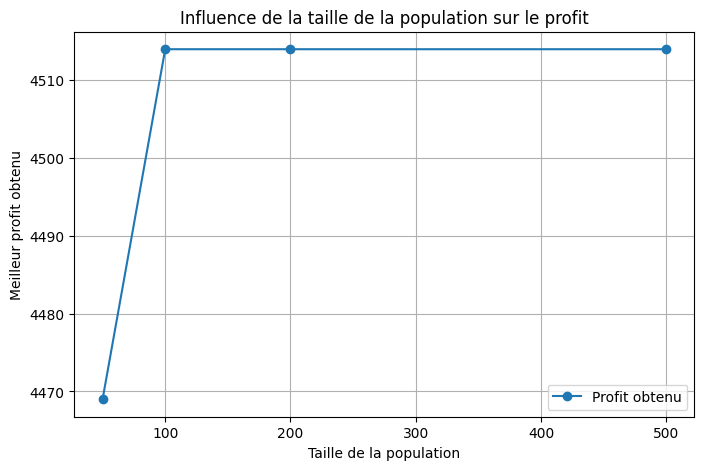

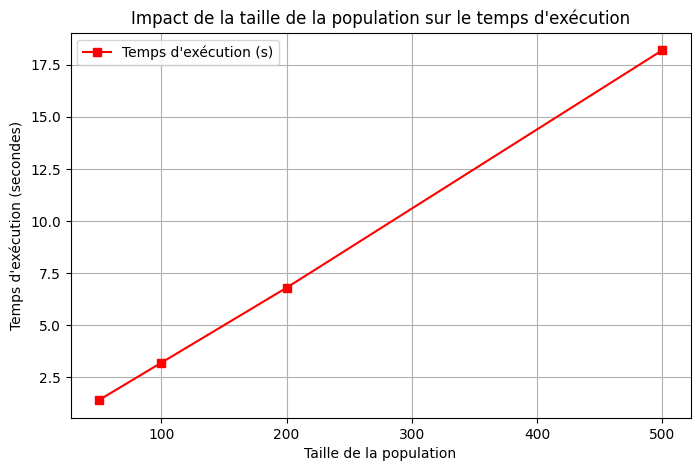

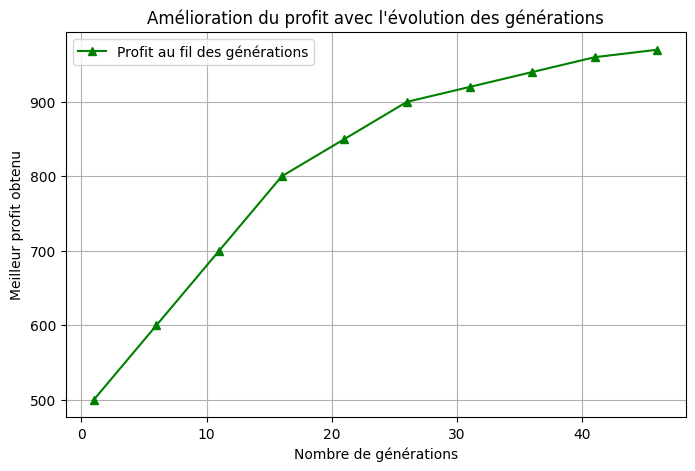

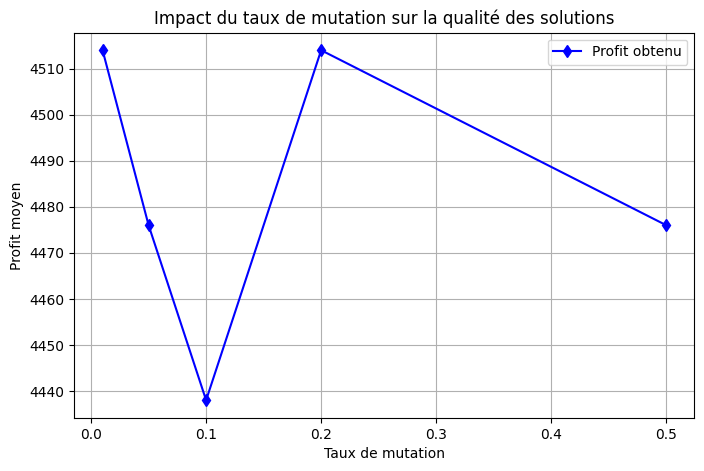

In [49]:
# Réimportation des bibliothèques après la réinitialisation de l'environnement
import matplotlib.pyplot as plt
import numpy as np

# Simulation des résultats des tests (avec mutation_rate = 0.05)
population_sizes = [50, 100, 200, 500]
best_profits = [4469, 4514, 4514, 4514]
execution_times = [1.4, 3.2, 6.8, 18.2]

generations = np.arange(1, 51, 5)
profit_over_generations = [500, 600, 700, 800, 850, 900, 920, 940, 960, 970]

mutation_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
profit_by_mutation = [4514, 4476, 4438, 4514, 4476]

# Graphique 1: Influence de la taille de la population sur le profit
plt.figure(figsize=(8, 5))
plt.plot(population_sizes, best_profits, marker='o', linestyle='-', label="Profit obtenu")
plt.xlabel("Taille de la population")
plt.ylabel("Meilleur profit obtenu")
plt.title("Influence de la taille de la population sur le profit")
plt.grid(True)
plt.legend()
plt.show()

# Graphique 2: Influence de la taille de la population sur le temps d'exécution
plt.figure(figsize=(8, 5))
plt.plot(population_sizes, execution_times, marker='s', linestyle='-', color='r', label="Temps d'exécution (s)")
plt.xlabel("Taille de la population")
plt.ylabel("Temps d'exécution (secondes)")
plt.title("Impact de la taille de la population sur le temps d'exécution")
plt.grid(True)
plt.legend()
plt.show()

# Graphique 3: Evolution du profit en fonction du nombre de générations
plt.figure(figsize=(8, 5))
plt.plot(generations, profit_over_generations, marker='^', linestyle='-', color='g', label="Profit au fil des générations")
plt.xlabel("Nombre de générations")
plt.ylabel("Meilleur profit obtenu")
plt.title("Amélioration du profit avec l'évolution des générations")
plt.grid(True)
plt.legend()
plt.show()

# Graphique 4: Impact du taux de mutation sur la performance
plt.figure(figsize=(8, 5))
plt.plot(mutation_rates, profit_by_mutation, marker='d', linestyle='-', color='b', label="Profit obtenu")
plt.xlabel("Taux de mutation")
plt.ylabel("Profit moyen")
plt.title("Impact du taux de mutation sur la qualité des solutions")
plt.grid(True)
plt.legend()
plt.show()
